In [2]:
#NETFLIX BUSINESS CASE

In [3]:
#The objective of this project is to analyze the given Netflix dataset and generate insights that could help Netflix in deciding which type of shows/movies
#to produce and how they can grow the business in different countries.

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [6]:
df = pd.read_csv('netflix.csv')

In [7]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Problem Statement :**

 The business goal is to help Netflix decide which type of content (movies or TV shows) to produce and how they can grow their subscriber base across different countries.Netflix is a global streaming platform, and the data provided includes details about movies and TV shows,such as their titles, genres, countries, release years, ratings, duration, and other relevant attributes.

In [8]:
# BASIC METRICS

In [9]:
# Shape of the dataset
df.shape

(8807, 12)

In [10]:
# Data types of each column
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [11]:
# Summary statistics for numeric columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [13]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


In [14]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Action & Adventure, Cult Movies",1
"Action & Adventure, Comedies, Music & Musicals",1
"Classic Movies, Horror Movies, Thrillers",1


In [15]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [16]:
df.nunique() #unique count of each variable

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [17]:
# Check for missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [21]:
df.describe() #statistical summary

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [22]:
df.describe(include = 'object') #statistical summary of categorical variables

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [23]:
#Data Cleaning

In [24]:
#(i) Calculating the Missing Data
for i in df.columns:
  null_values = round(100* df[i].isnull().sum()/ len(df),2)
  if null_values > 0:
    print("{} missing percentage : {}%".format(i, null_values))

director missing percentage : 29.91%
cast missing percentage : 9.37%
country missing percentage : 9.44%
date_added missing percentage : 0.11%
rating missing percentage : 0.05%
duration missing percentage : 0.03%


In [25]:
#(ii) Dealing with the Missing Data
df.fillna({'country': "Unknown Country",
           'cast': "Unknown Actor",
           'director': "Unknown Director"}, inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [26]:
#(iii) Unnesting cast, director, company & listed_in coulumn's data.
df_cast = df["cast"].str.split(", |,| ,", expand = True).stack() #splitting and expanding cast column and making new dataframe for cast
df_cast = df_cast.reset_index(drop = True, level = 1).to_frame("cast")
df_cast["show_id"] = df["show_id"]

df_director = df["director"].str.split(", |,| ,", expand = True).stack() #splitting and expanding director column and making new dataframe for director
df_director = df_director.reset_index(drop =True, level = 1).to_frame("director")
df_director["show_id"] = df["show_id"]

df_country = df["country"].str.split(", |,| ,", expand = True).stack() #splitting and expanding country column and making new dataframe for country
df_country = df_country.reset_index(drop =True, level = 1).to_frame("country")
df_country["show_id"] = df["show_id"]

df_genre = df["listed_in"].str.split(", |,| ,", expand = True).stack() #splitting and expanding listed_in and making new dataframe for listed_in
df_genre = df_genre.reset_index(drop =True, level = 1).to_frame("genre")
df_genre["show_id"] = df["show_id"]

In [27]:
#(iv) Data Transformation
# changing datatype of date_added column
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['week_added'] = df['date_added'].dt.isocalendar().week

In [28]:
df.shape

(8790, 16)

In [29]:
#Analysis

In [30]:
#Count of each categorical variable using non- graphical analysis.
df_count = df.nunique().reset_index()
df_count.columns = ["variable", "total_count"]
df_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
variable,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
total_count,8790,2,8790,4527,7679,749,1713,74,14,220,513,8758,12,12,14,53


In [31]:
print("This dataset is from ", df.date_added.dt.date.min().strftime("%d-%m-%Y"), "to ",df.date_added.dt.date.max().strftime("%d-%m-%Y"))

This dataset is from  01-01-2008 to  25-09-2021


**Insight**  - As per the dataset, there are total 8790 unique show_ids(includes Movie & TV Shows).

The count of director is 4992. So we can conclude that one director directed more than one Movie or TV Show.

Total cast members are 36393.

This is consolidated dataset of 124 countries.

Release year is the year when particular Movie & TV Show get released.

Rating is the ratings of the content.

Duration is the duration of specific Movie or TV Show.

Listed_in is the genre list of Movies & TV Shows.

Description is the details of Movie & TV Show.

Few more columns are generated for further analysis in depth.

This is the dataset from 2008-01-01 and 2021-09-25.

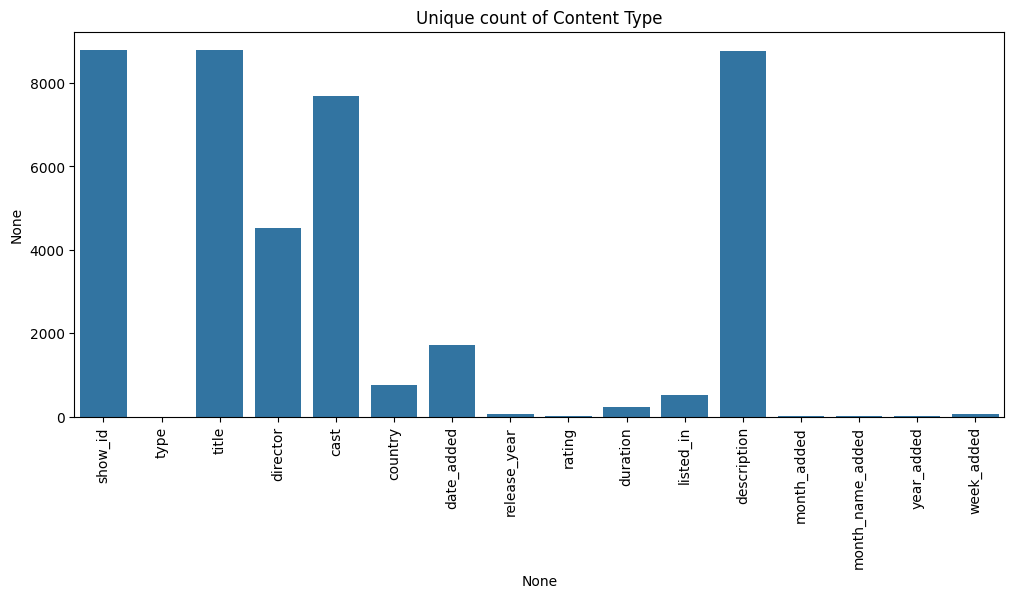

In [33]:
#Count of each categorical variable using graphical analysis.
plt.figure(figsize = (12,5)) #change figure size
sns.barplot(x = df.nunique().index, y = df.nunique()) #plot x and y values
plt.xticks(rotation = 90) #rotate x ticks on 90 degree
plt.title("Unique count of Content Type")
plt.show() #show bar plot

Insight - This barplot shows count of all the variables of the dataset.

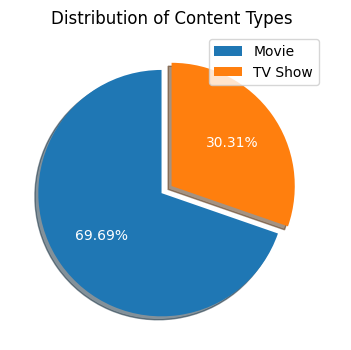

In [34]:
#Comparison of TV Show vs Movie.
plt.figure(figsize = (4,4))
x = df.groupby("type")["type"].count()
y = len(df)
r = (x/y*100).round(2)
perc_data = pd.DataFrame(r)
plt.pie(x = perc_data["type"], labels = perc_data.index, autopct = "%1.2f%%", startangle = 90, shadow = True, explode=(0.1,0), textprops={'color': 'white'})

plt.title('Distribution of Content Types') #Pie chart for distribution of Movies & TV Shoes
plt.legend(loc='upper right')
plt.show()

Insight - From the above analysis, we can clearly see that movie counts for countries are far greater than TV show.

Seems, Netflix should focus of TV Shows as well to uplift the market of this type.

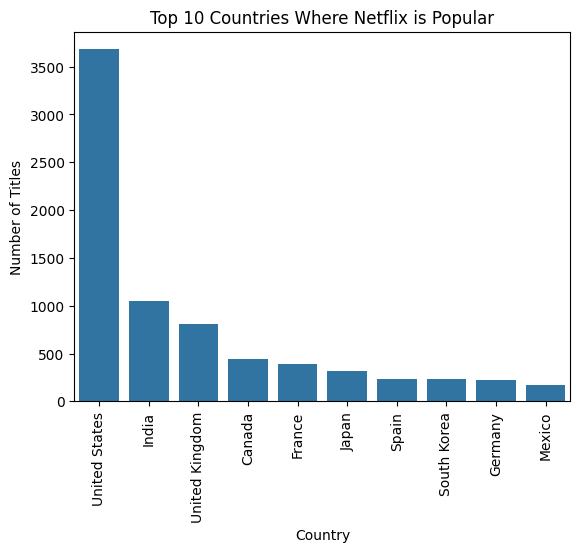

In [35]:
#Top 10 Countries Where Netflix is Popular

df_country = df_country.loc[df_country["country"]!="Unknown Country"]
top_10_country = df_country["country"].value_counts().head(10)
sns.barplot(x = top_10_country.index, y = top_10_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular')
plt.xticks(rotation = 90)
plt.show()

Insight - Above graph clearly depicts that US is the top most country where people are fond of Netflix, followed by India & then UK.

Netflix should work on the country where popularity is weak.

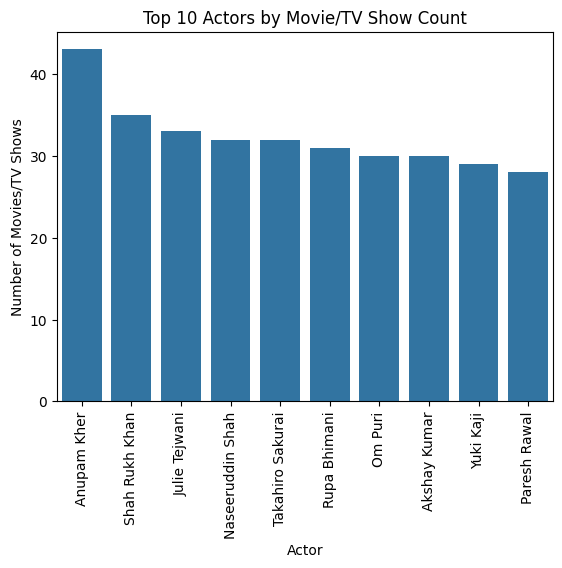

In [36]:
#Top 10 Actor by Movie/TV Show count.

df_cast = df_cast.loc[df_cast["cast"]!="Unknown Actor"]
top_10_actor = df_cast["cast"].value_counts().head(10)
sns.barplot(x = top_10_actor.index, y = top_10_actor.values)
plt.xlabel('Actor')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Actors by Movie/TV Show Count')
plt.xticks(rotation = 90)
plt.show()

Insight - Clearly visible that Anupam kher is the best choice for most of the people, followed by SRK & then Julie Tejwani.

Netflix can focus on adding more content of the preferred actors by the majority of the people.

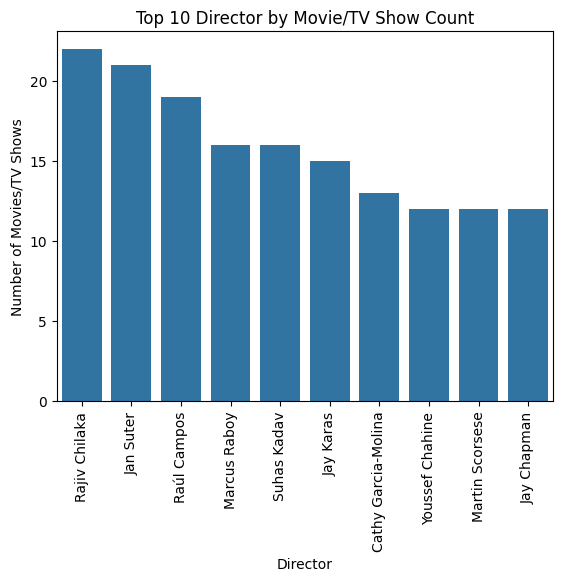

In [37]:
#Top 10 Directors by Movie/TV Show Count
df_director = df_director.loc[df_director["director"]!="Unknown Director"]
top_10_director = df_director["director"].value_counts().head(10)
sns.barplot(x = top_10_director.index, y = top_10_director.values)
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Director by Movie/TV Show Count')
plt.xticks(rotation = 90)
plt.show()

Insight - Rajiv Chilaka is the best Director amoungest all the directors followed by Jan Suter & then Raul Campos.

Netflix can add more content directed by the popular directors.

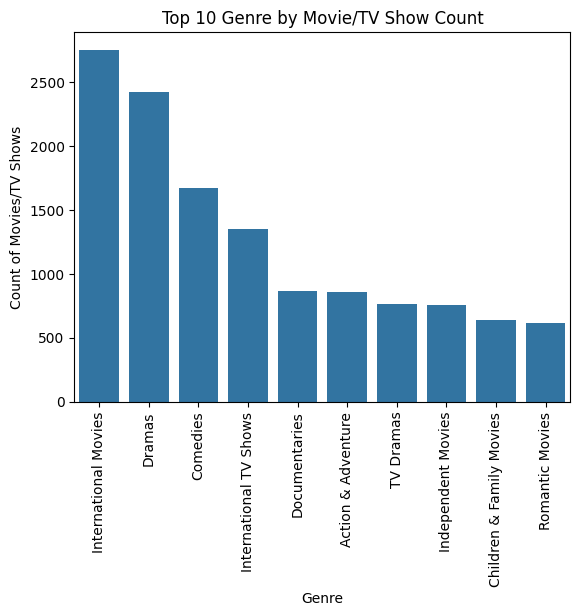

In [38]:
#Top 10 Genre by Movie/ TV Show Count

df_genre = df_genre.loc[df_genre["genre"]!="Unknown Director"]
top_10_genre = df_genre["genre"].value_counts().head(10)
sns.barplot(x = top_10_genre.index, y = top_10_genre.values)
plt.xlabel('Genre')
plt.ylabel('Count of Movies/TV Shows')
plt.title('Top 10 Genre by Movie/TV Show Count')
plt.xticks(rotation = 90)
plt.show()

Insight - Genre which is topping the list is International Movies, followed by Dramas, & then Comedies.

Netflix should keeps on adding more content of these Genres.

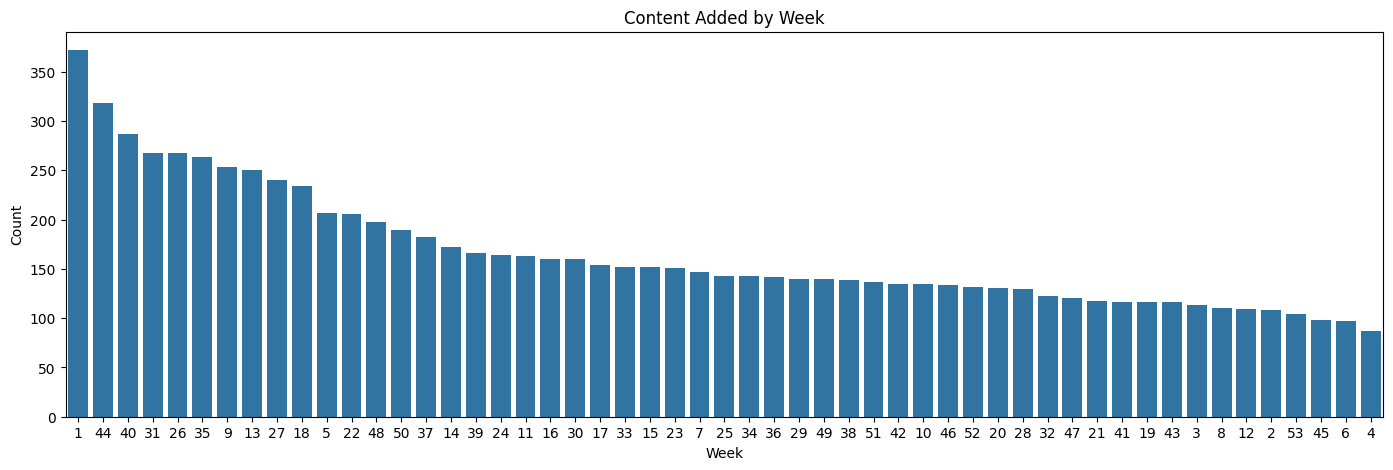

In [39]:
#Best week to add Content.

plt.figure(figsize = (17,5))
result = df.groupby(["week_added"])['title'].count().reset_index().sort_values('title', ascending = False)
weekly_df = df["week_added"].value_counts()
sns.barplot(x = weekly_df.index , y = weekly_df.values, order = result["week_added"])

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Content Added by Week')
plt.show()

Insight - From the above analysis we can conclude that the best week to add the movie is 1st which further followed by 44th , 40th week of the year and so on..

This analysis shows that people tend to watch more content in the beginning of the year, followed by the last quater of the year. The reason can be the winter break for students and year ending leaves for the employees.

So, Netflix should add more content at the preferable time of the subscribers.

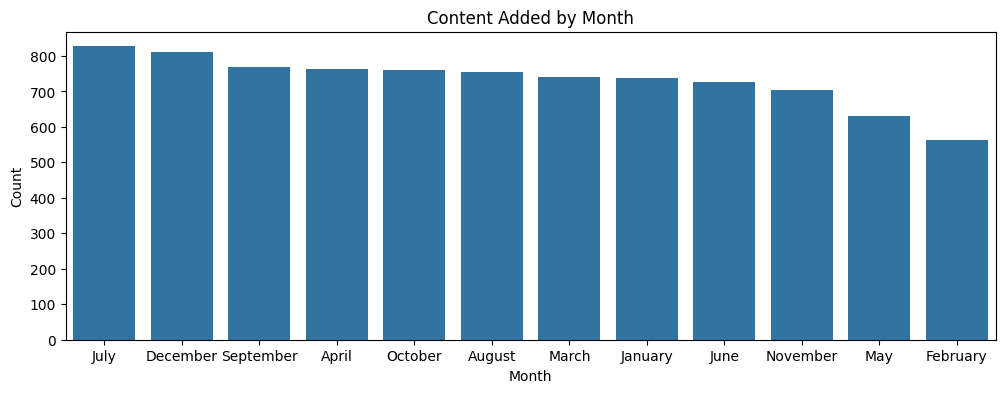

In [40]:
#Best month to add Content.
plt.figure(figsize = (12,4))
result = df.groupby(["month_name_added"])['title'].count().reset_index().sort_values('title', ascending = False)
monthly_df = df["month_name_added"].value_counts()
sns.barplot(x = monthly_df.index , y = monthly_df.values, order = result["month_name_added"])

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')
plt.show()

Insight - Above analysis shows that July is the best month to add a movie, which can further followed by December & September.

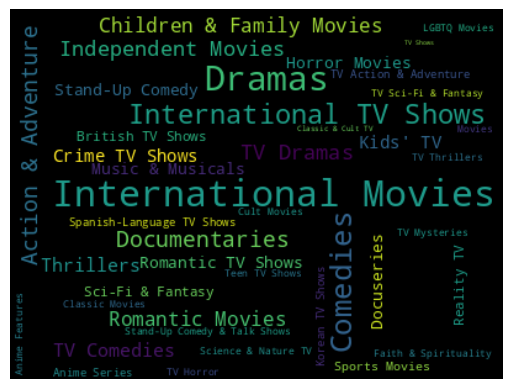

In [41]:
#Popularity of Genre.
from wordcloud import WordCloud
text = ",".join(genre for genre in df_genre.genre)  #creating list of all the values of listed_in column

word = text.split(",")
dic = {}
for item in word:
  if item in dic:
    dic[item] += 1
  else:
    dic[item] = 1

wordcloud = WordCloud(width = 400, height = 300)
wordcloud.generate_from_frequencies(dic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Insight - From the above generated Word Cloud, we can clearly see that the first category which is topping the list is 'International Movies'. But the list is not ending here and with very small difference International Movies are followed by Dramas, International TV Shows, Comedies and so on.

It is advisable that Netflix should work on the genre which is not getting popularity. Also, Netflix can shift the focus from less popular genre to the popular genre and can make labour, time, money and resources more productive.

In [42]:
#Years after the release Movie should be added to Netflix.

In [43]:
df["added_release_diff"] = df.year_added - df.release_year #difference between added_year and release year

In [44]:
df.added_release_diff.mode().reset_index() #mode of year difference between release date and added date

,index,added_release_diff
0,0,0


Insight - From the past data analysis, we can conclude that content should be added to the Netflix in the same year when the content gets released.

The early the content will be avaliable for the subscribers , people will be more eager to watch the Movies & TV Shoes.

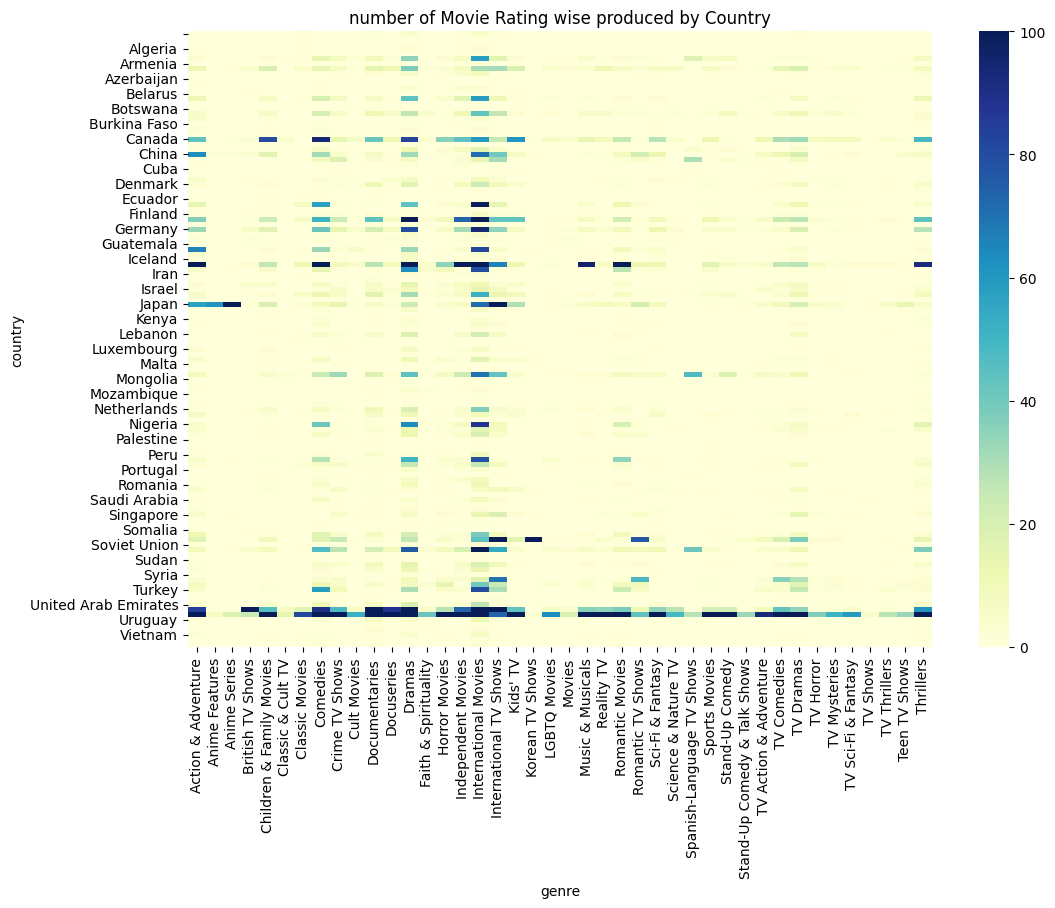

In [45]:
#Type of content available in different countries.
country_content = pd.merge(df_country, df_genre)
country_content = country_content[["country","genre"]]
country_content["serial_number"] = country_content.index
country_content.reset_index(drop=True, inplace=True)

country_content =country_content.pivot_table(index="country",columns=["genre"], aggfunc ="size",fill_value = 0)
country_content[country_content != 0].dropna()

country_content_reset = country_content.reset_index()
plt.figure(figsize=(12, 8))
sns.heatmap(country_content_reset.set_index('country'), fmt='d', cmap='YlGnBu', vmin=100, vmax=0)
plt.title('number of Movie Rating wise produced by Country')
plt.xlabel('genre')
plt.ylabel('country')
plt.show()

Insight - Above heatmap of Country & Genre shows that more or less count of particular genre in the countries.

From the above analysis it is advisable that Netflix should stop listing those genre which are not getting any views as per the country.

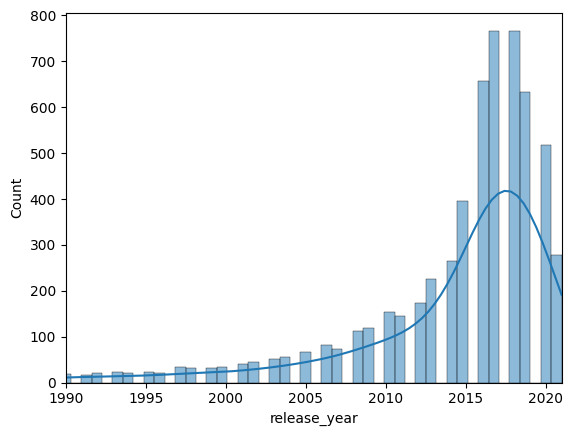

In [46]:
#Number of movies released per year changed over the last 20-30 years.
movie_df_trend = df.loc[df.type=="Movie"]
sns.histplot(movie_df_trend.release_year, kde = True)
plt.xlim([1990, 2021])
plt.show()

Insight - Above histplot and kdeplot shows the graph of movie release goes up rapidly over the last 20-30 years. but the count came down in the 2020 due to the pendamic of Corona & Lockdown.

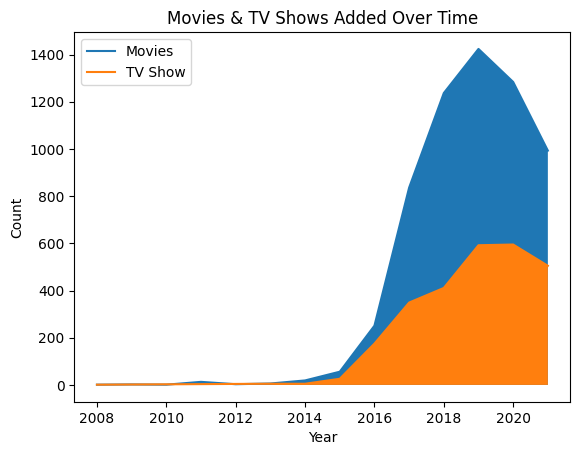

In [47]:
#Content added over the years.
movie_df = df[df.type=="Movie"]
tvshow_df = df[df.type=="TV Show"]

movie_count = movie_df["year_added"].value_counts().sort_index()
tvshow_count = tvshow_df["year_added"].value_counts().sort_index()


plt.plot(movie_count.index,movie_count.values, label = "Movies")
plt.plot(tvshow_count.index,tvshow_count.values, label = "TV Show")

plt.legend(loc = "upper left")

plt.fill_between(movie_count.index,movie_count.values, label = "Movies")
plt.fill_between(tvshow_count.index,tvshow_count.values, label = "Movies")

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.show()

Insight - Above plot shows that the count of TV Shows are very less in comparison of Movies.

Definitely Netflix have to work on TV Shows part to increase revenue from this area of the business.

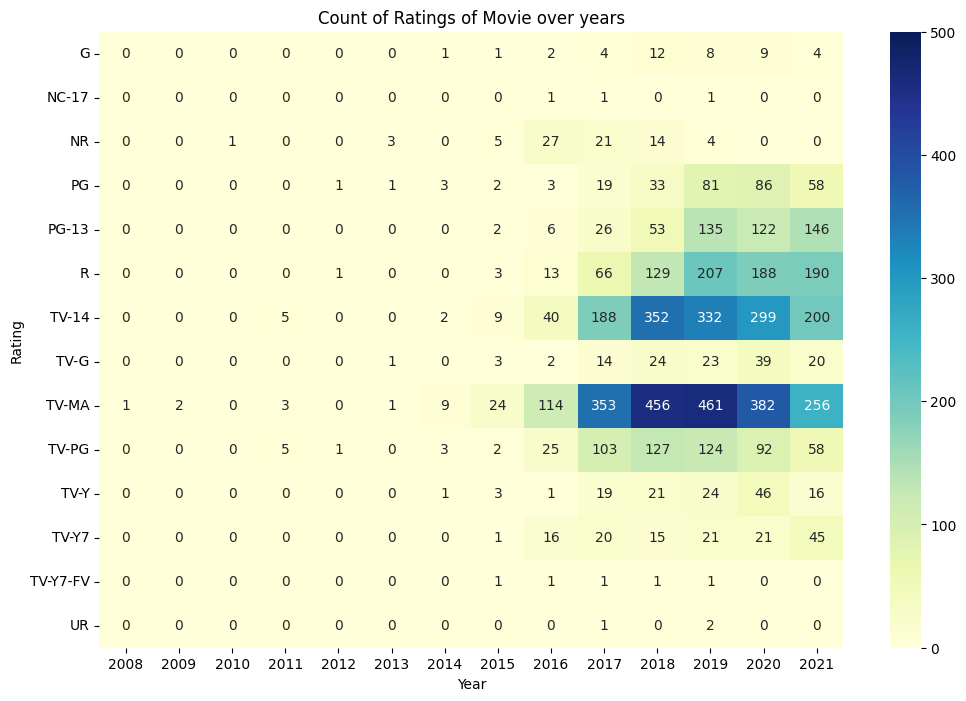

In [48]:
#Rating count of Movies over years.

df_rating_year = df[["rating", "type", "year_added"]]

df_rating_year = df_rating_year[df_rating_year["type"] == "Movie"]
df_rating_year = df_rating_year.pivot_table(index='rating', columns='year_added', aggfunc='size', fill_value=0)
df_rating_year[df_rating_year != 0].dropna()

df_rating_year_reset = df_rating_year.reset_index()
plt.figure(figsize=(12, 8))
sns.heatmap(df_rating_year_reset.set_index('rating'), fmt='d',annot=True, cmap='YlGnBu', vmin=500, vmax=0)
plt.title('Count of Ratings of Movie over years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Insight - Above heatmap clearly shows the count of Movies rating across all the years.

Netflix should work on the rating which are not at all choice of the subscribers.

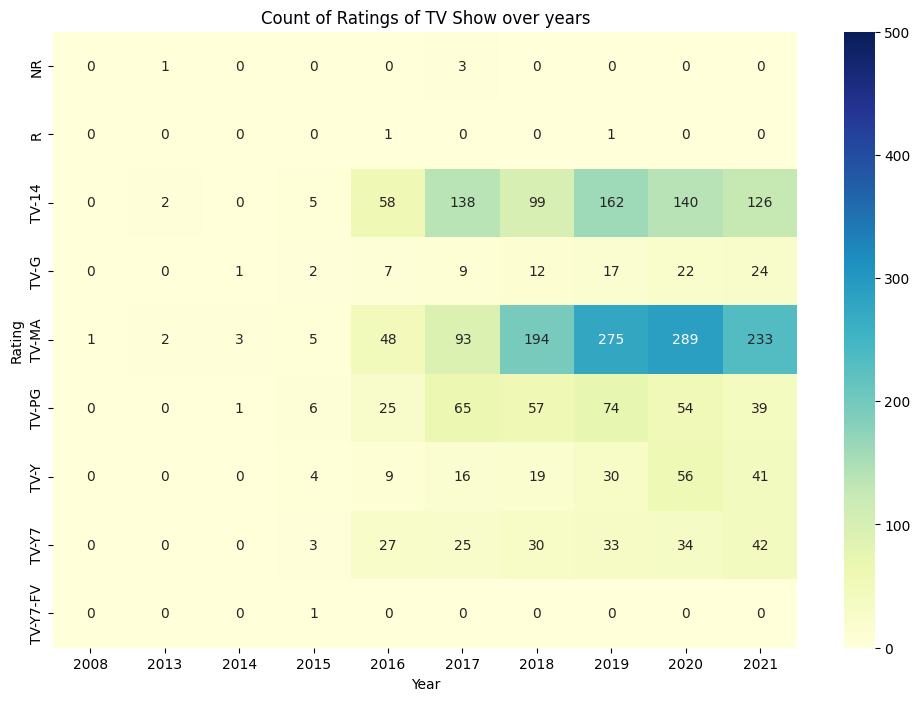

In [49]:
#Rating count of TV Show over years.

df_rating_year = df[["rating", "type", "year_added"]]

df_rating_year = df_rating_year[df_rating_year["type"] == "TV Show"]
df_rating_year = df_rating_year.pivot_table(index='rating', columns='year_added', aggfunc='size', fill_value=0)
df_rating_year[df_rating_year != 0].dropna()

df_rating_year_reset = df_rating_year.reset_index()
plt.figure(figsize=(12, 8))
sns.heatmap(df_rating_year_reset.set_index('rating'), fmt='d',annot=True, cmap='YlGnBu', vmin=500, vmax=0)
plt.title('Count of Ratings of TV Show over years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Insight - Above heatmap clearly shows the count of TV Shows rating across all the years.

Netflix should work on the rating which are not at all choice of the subscribers.

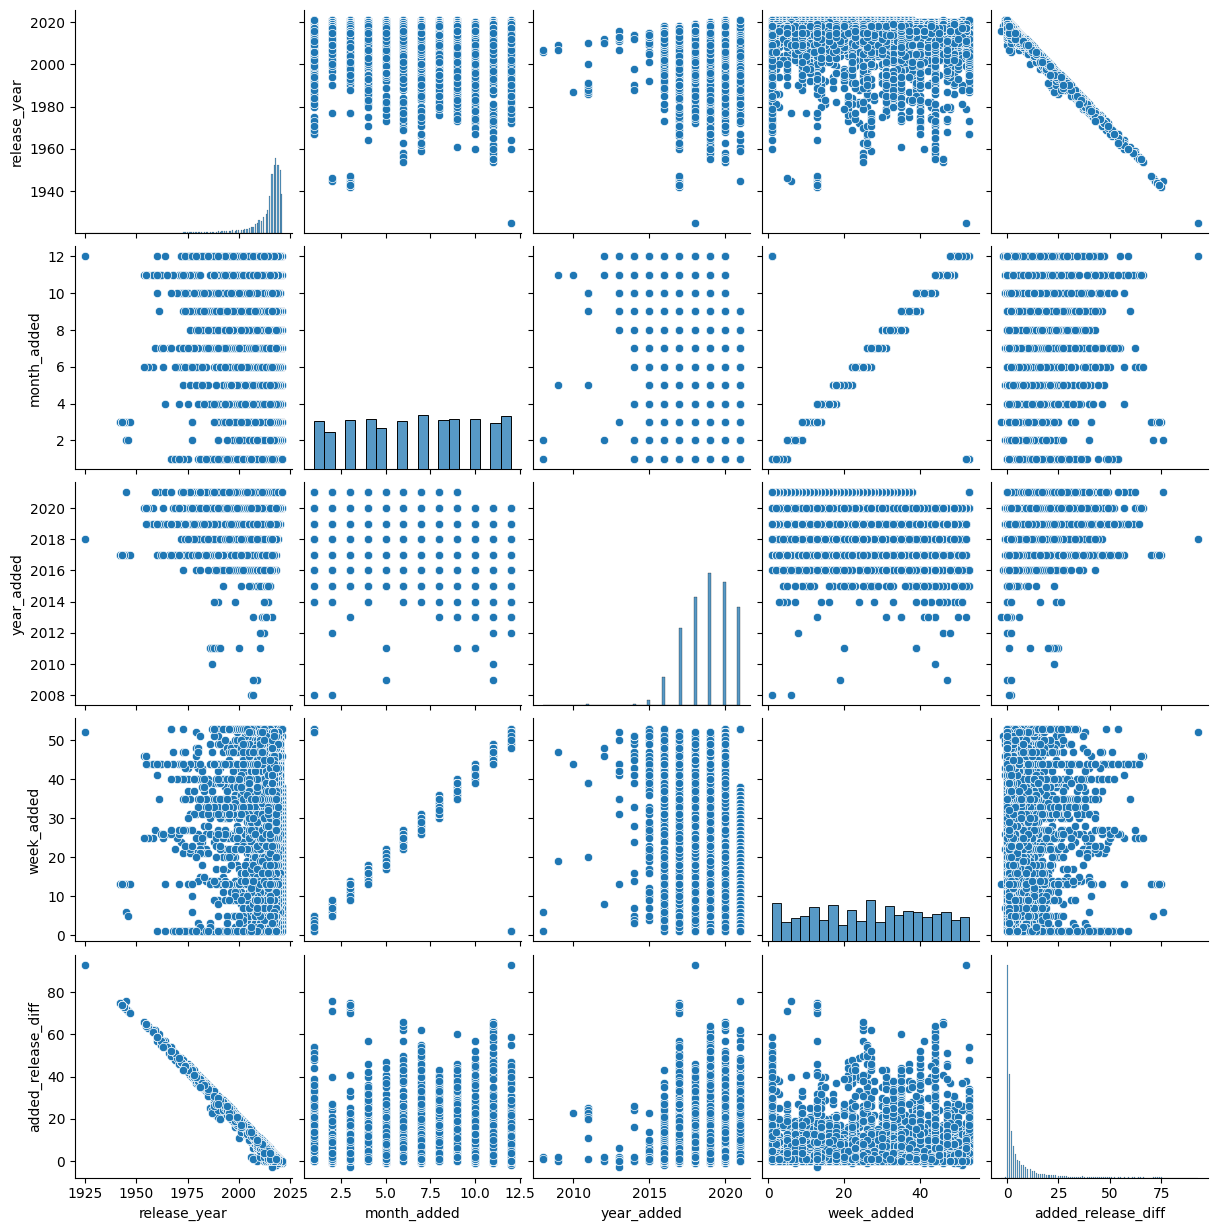

In [50]:
#Pairwise Relationship

sns.pairplot(df)
plt.show()

Insight - Above pairplot visualize relationships among variables of the dataset. With this, each plot shows the relationship between a pair of variables.

This shows distributions of a single variable and relationships between two variables.

/tmp/ipython-input-3907545642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df_movie["duration_new"] = duration_df_movie["duration"].str.split(" ").str[0].astype("int")


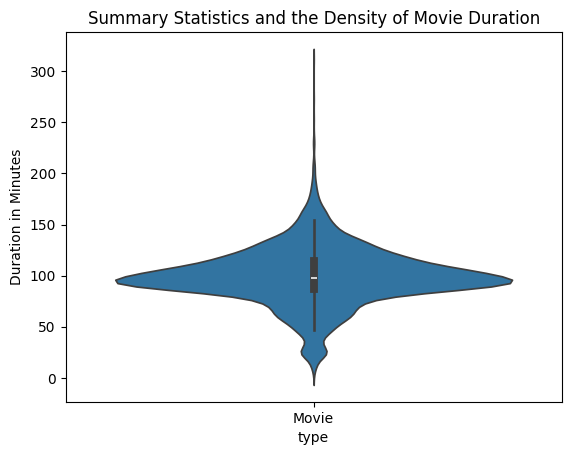

In [51]:
duration_df_movie = df.loc[df.type=="Movie"]
duration_df_movie["duration_new"] = duration_df_movie["duration"].str.split(" ").str[0].astype("int")
sns.violinplot(x = duration_df_movie.type, y = duration_df_movie.duration_new)
plt.ylabel("Duration in Minutes")
plt.title("Summary Statistics and the Density of Movie Duration")
plt.show()

Insight - Above violinplot shows that the duration of most of the Movies is between 75 to 150 minutes. So Netflix can continue with this approach for further streamings.

/tmp/ipython-input-2682140886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df_tvshow["duration_new"] = duration_df_tvshow["duration"].str.split(" ").str[0].astype("int")


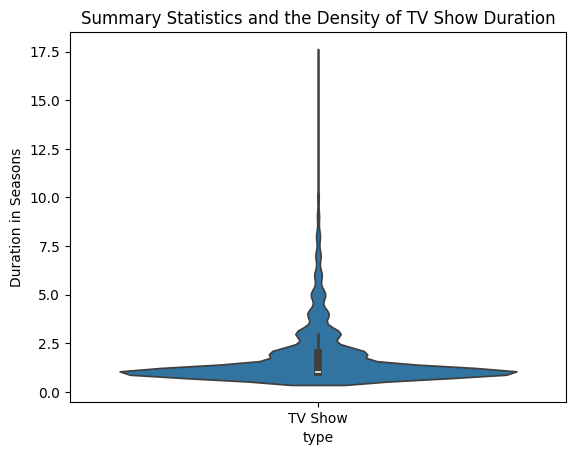

In [52]:
duration_df_tvshow = df.loc[df.type=="TV Show"]
duration_df_tvshow["duration_new"] = duration_df_tvshow["duration"].str.split(" ").str[0].astype("int")
sns.violinplot(x = duration_df_tvshow.type, y = duration_df_tvshow.duration_new)
plt.ylabel("Duration in Seasons")
plt.title("Summary Statistics and the Density of TV Show Duration")
plt.show()

Insight - Above violinplot shows that the duration of most of the TV Shows is between 1 to 3 Seasons. So Netflix can continue with this approach for further streamings.

**CONCLUSIONS :**

**Quantity :**

This analysis revealed that Netflix had added more movies than TV shows, aligning with the expectation that movies dominate their content library.

**Content Addition :**

July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release.

**Genre Correlation :**

Strong positive associations were observed between various genres, such as TV dramas and international TV shows, romantic and international TV shows, and independent movies and dramas. These correlations provide insights into viewer preferences and content interconnections.

**Rating Distribution :**

The distribution of ratings over the years offers insights into the evolving content landscape and audience reception.

**Continued Relevance :**

As the streaming industry evolves, understanding patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.

**Recommendations:**

1. We have 6126 Movies compared to 2664 TV Shows which is like 2.3x of TV Shows, But in recent years, the trend has changed. In the last 5 years, the Movies proportion has reduced from ~75% to ~47% while TV Show's share has increased from ~25% to ~53%. This reflects that over the period a smaller number of Movies are getting released while more and more TV Shows are getting aired.

2. Netflix is currently serving mostly Mature audiences or Children with parental guidance (around 80% of content on Netflix). It has scope to cater to other audiences as well such as family men, Senior citizens, kids of various ages, etc.

3. It is observed that shorter-duration content is on the rise in the last 10 years. (duration 75 to 150 minutes and seasons 1 to 3) . This can be considered while production of new content on Netflix.

4. Netflix has the majority of content which is released after the year 2000. It is observed that content older than the year 2000 is very scarce on Netflix. Senior Citizens could be the target audience for such content, which is almost missing currently.

5. Very limited genres are focussed in most of the countries except the US. It seems the currently available genres suit best for the US and a few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular in India. We can create more country-specific genres and It might also be liked across the world just like Japanese Anime.

6. Japan has only 3 ratings of content largely served - TV-MA, TV-14, and TV-PG. Japan has a high population of age above 60, and this can be served by increasing the content suitable for this age group.

7. Country-specific insights - The content needs to be targetting the demographic of any country. Netflix can produce a higher number of content in a particular rating as per the demographic of the country. Eg. A country like India, which is highly populous, has maximum content available only in three ratings TV-MA, TV-14, and TV-PG. It is unlikely to serve the below 14 age and above 35 year age group with only these ratings being available.

8. Maximum content of Netflix which is around 75%, is coming from the top 10 countries. The United States is the highest contributor, followed by India and the United Kingdom. The rest of the world only contributes 25% of the content. More countries with suitable genres and ratings can be focussed on in the future to grow the business.